In [2]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(style="whitegrid")

%matplotlib inline

In [3]:
df = pd.read_csv('../data/datatran_2016-2017.csv')
df.shape

/Users/leportella/.virtualenvs/udacity/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(180991, 32)

In [4]:
df.head(2)

,delegacia,feridos,feridos_graves,feridos_leves,ignorados,ilesos,latitude,longitude,mortos,municipio,...,accident_type,accident_type_simplified,accident_cause_simplified,climate,moment_of_day,km_int,br_str,road_type,road_way,road_layout
0,DEL7/7,1,1,0,0,0,-23.098807,-52.387894,0,PARANAVAI ...,...,vehicle occupant fall,vehicle occupant fall,nature phenomena,rain,night,112,376,simple,up,straight
1,DEL8/1,0,0,0,0,1,-27.810100,-48.635700,0,PALHOCA ...,...,collision with static object,collision,lack of attention to driving,rain,night,234,101,double,up,curve


In [4]:
df.describe()

,feridos,feridos_graves,feridos_leves,ignorados,ilesos,latitude,longitude,mortos,pessoas,veiculos,hora,ano,mes,dia,target,km_int,br_str
count,180991.000000,180991.000000,180991.000000,180991.000000,180991.000000,8.803800e+04,8.803800e+04,180991.000000,180991.000000,180991.000000,180991.000000,180991.000000,180991.000000,180991.000000,180991.000000,180991.000000,180991.000000
mean,0.927958,0.216845,0.711113,0.104967,1.175020,-1.224730e+04,-4.675403e+04,0.068296,2.276257,1.637385,12.903896,2016.486422,6.487577,15.666917,0.702333,349.007697,293.946716
std,1.208895,0.565576,1.060622,0.436382,1.433254,3.484308e+06,1.353950e+07,0.321390,1.820498,0.754058,6.017546,0.499817,3.485369,8.780671,0.568139,2821.291985,2816.465002
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.033383e+09,-4.016764e+09,0.000000,1.000000,1.000000,0.000000,2016.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,-2.538202e+01,-5.034147e+01,0.000000,1.000000,1.000000,8.000000,2016.000000,3.000000,8.000000,0.000000,81.000000,101.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,-2.065174e+01,-4.794863e+01,0.000000,2.000000,2.000000,14.000000,2016.000000,6.000000,16.000000,1.000000,207.000000,163.000000
75%,1.000000,0.000000,1.000000,0.000000,2.000000,-1.358920e+01,-4.279451e+01,0.000000,3.000000,2.000000,18.000000,2017.000000,10.000000,23.000000,1.000000,427.000000,324.000000
max,62.000000,24.000000,45.000000,67.000000,65.000000,1.630000e+02,7.170000e+02,21.000000,91.000000,18.000000,23.000000,2017.000000,12.000000,31.000000,2.000000,99999.000000,99999.000000


In [5]:
df.weekday.value_counts()

saturday     30484
sunday       29323
friday       28229
monday       24481
thursday     23977
wednesday    22579
tuesday      21918
Name: weekday, dtype: int64

(20000, 31000)

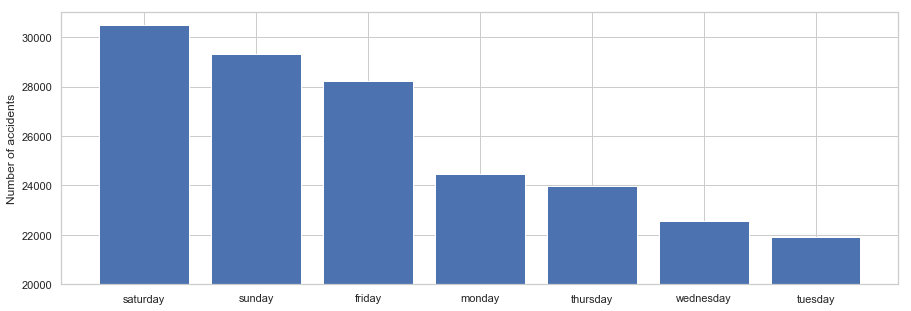

In [6]:
plt.figure(figsize=(15,5))
plt.bar(np.arange(7), df.weekday.value_counts())
ticks = plt.xticks(np.arange(7), df.weekday.value_counts().index)
plt.ylabel('Number of accidents')
plt.ylim(20000, 31000)

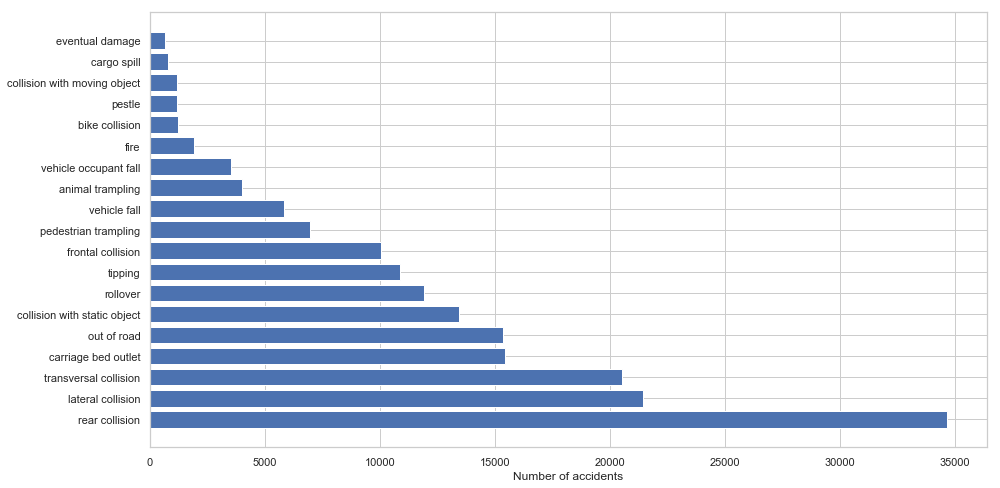

In [7]:
dd = df.accident_type.value_counts()

plt.figure(figsize=(15,8))
plt.barh(np.arange(len(dd)), dd)
ticks = plt.yticks(np.arange(len(dd)), dd.index)
plt.xlabel('Number of accidents')

In [8]:
grouped = df.groupby(['accident_type', 'target']).size().unstack()
grouped['type'] = grouped.index
grouped.head()

target,0,1,2,type
accident_type,,,,
animal trampling,2000,1869,151,animal trampling
bike collision,30,991,182,bike collision
cargo spill,724,70,3,cargo spill
carriage bed outlet,7049,7854,540,carriage bed outlet
collision with moving object,471,634,52,collision with moving object


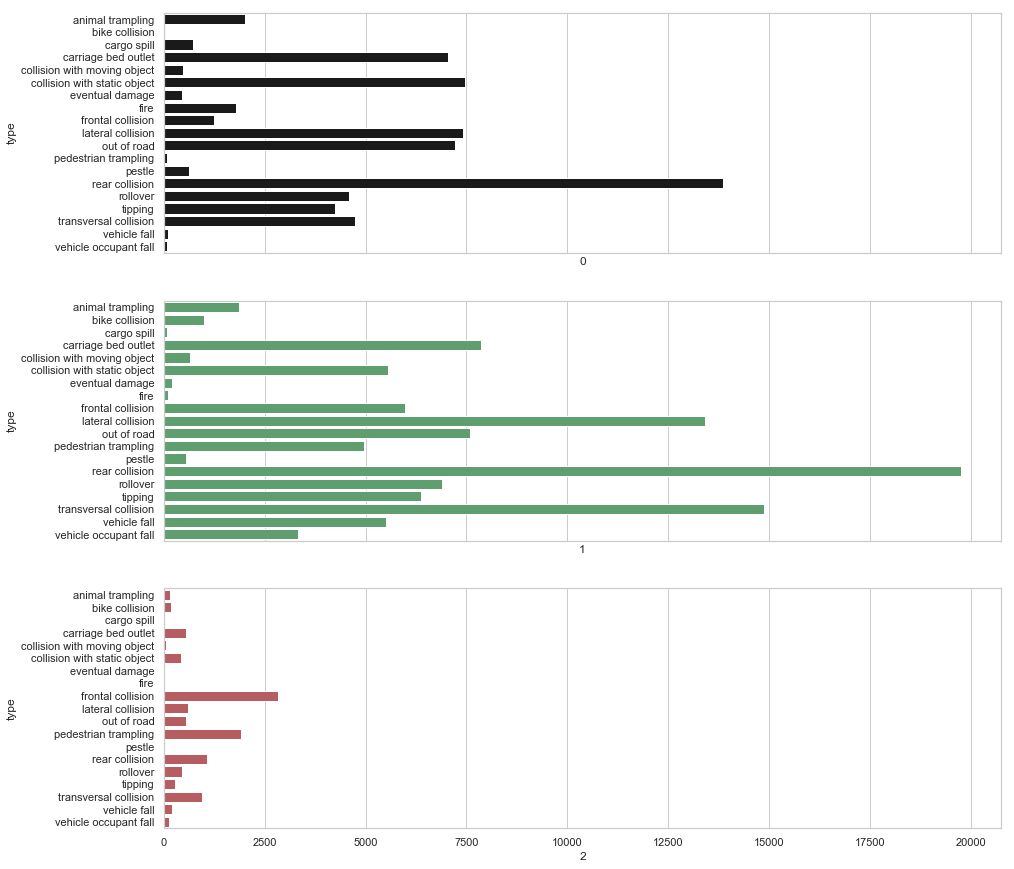

In [9]:
sns.set(style="whitegrid")
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 15), sharex=True)

sns.barplot(x=0, y="type", data=grouped, label="Dead", color="k", ax=ax1)
sns.barplot(x=1, y="type", data=grouped, label="Injuried", color="g", ax=ax2)
sns.barplot(x=2, y="type", data=grouped, label="No Victims", color="r", ax=ax3)

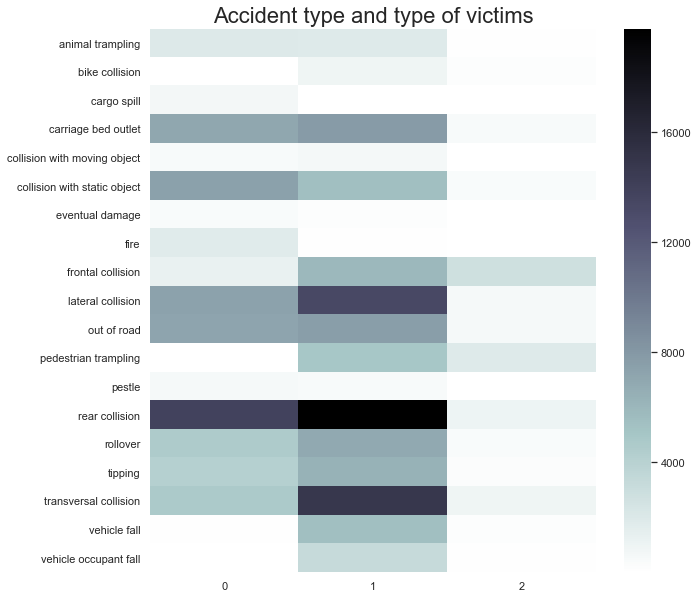

In [10]:
grouped = df.groupby(['accident_type', 'target']).size().unstack()

plt.figure(figsize=(10,10))
sns.heatmap(grouped, cmap='bone_r')
plt.title('Accident type and type of victims', fontsize=22)
plt.ylabel('')
plt.xlabel('')

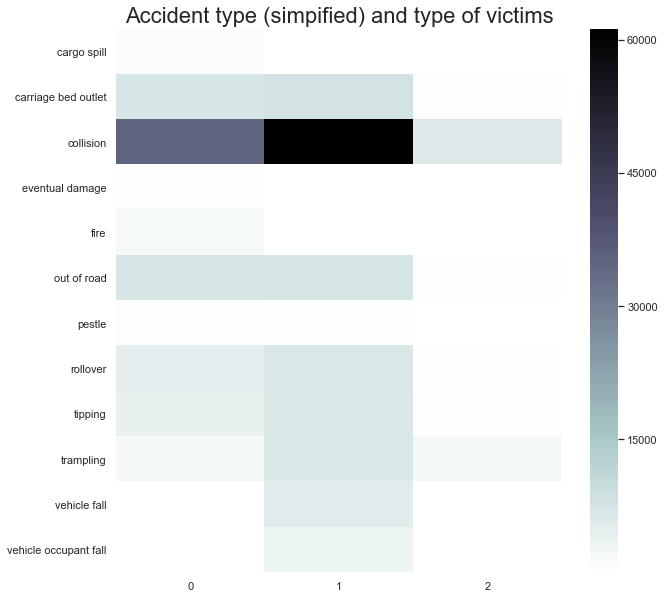

In [11]:
grouped = df.groupby(['accident_type_simplified', 'target']).size().unstack()

plt.figure(figsize=(10,10))
sns.heatmap(grouped, cmap='bone_r')
plt.title('Accident type (simpified) and type of victims', fontsize=22)
plt.ylabel('')
plt.xlabel('')

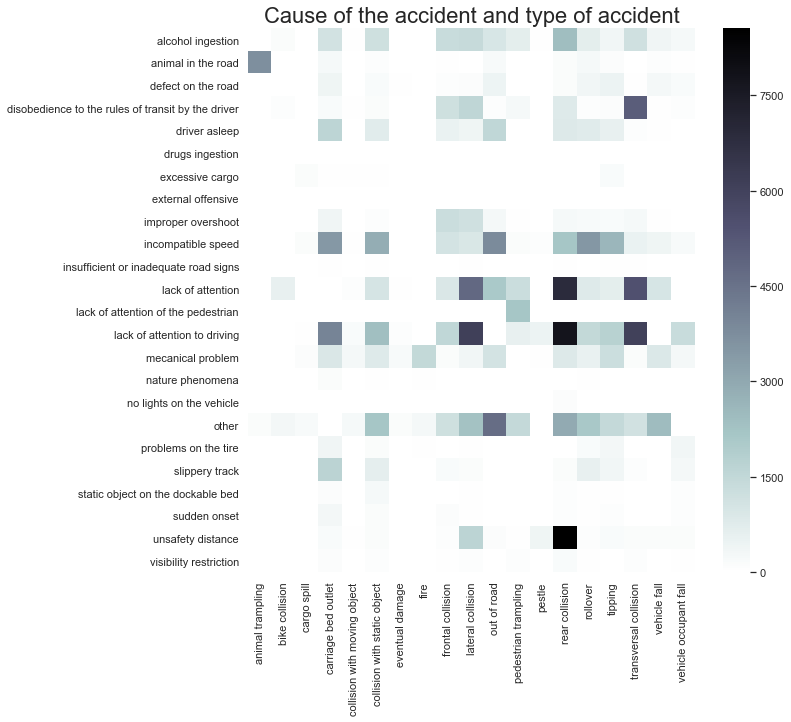

In [12]:
df['causa_acidente'] = df.accident_cause_simplified.apply(lambda x: x.strip())
df['tipo_acidente'] = df.accident_type.apply(lambda x: x.strip())

gp = df.groupby(['causa_acidente', 'tipo_acidente']).size().unstack()
gp.fillna(0, inplace=True)

plt.figure(figsize=(10,10))
sns.heatmap(gp, cmap='bone_r')
plt.title('Cause of the accident and type of accident', fontsize=22)
plt.ylabel('')
plt.xlabel('')

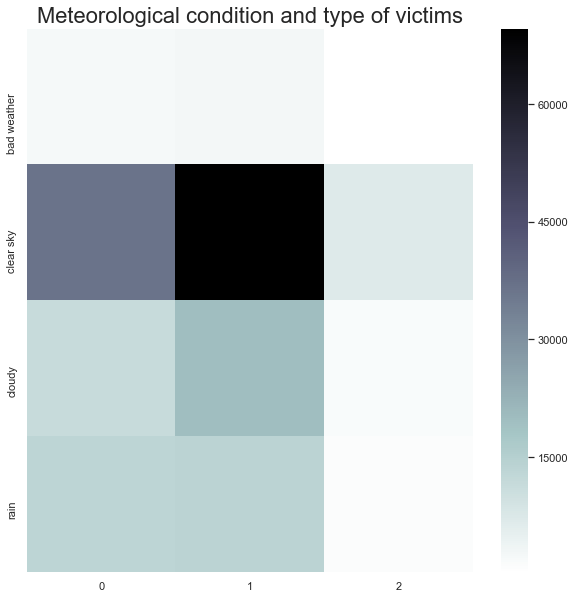

In [13]:
grouped = df.groupby(['climate', 'target']).size().unstack()

plt.figure(figsize=(10,10))
sns.heatmap(grouped, cmap='bone_r')
plt.title('Meteorological condition and type of victims', fontsize=22)
plt.ylabel('')
plt.xlabel('')

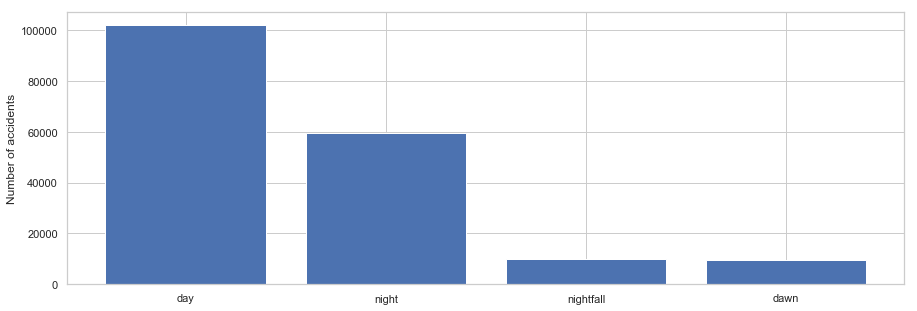

In [14]:
plt.figure(figsize=(15,5))
plt.bar(np.arange(4), df.moment_of_day.value_counts())
ticks = plt.xticks(np.arange(4), df.moment_of_day.value_counts().index)
plt.ylabel('Number of accidents')

In [15]:
df.moment_of_day.value_counts() / df.shape[0]

day          0.562951
night        0.328431
nightfall    0.055052
dawn         0.053566
Name: moment_of_day, dtype: float64

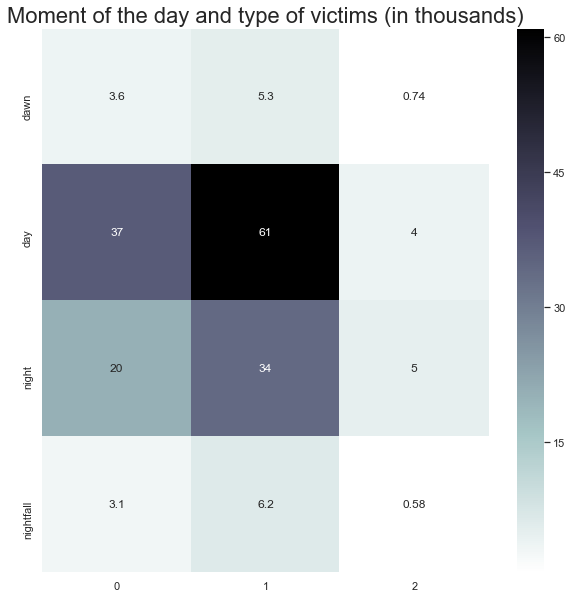

In [16]:
grouped = df.groupby(['moment_of_day', 'target']).size().unstack()

plt.figure(figsize=(10,10))
sns.heatmap(grouped/1000, cmap='bone_r', annot=True)
plt.title('Moment of the day and type of victims (in thousands)', fontsize=22)
plt.ylabel('')
plt.xlabel('')

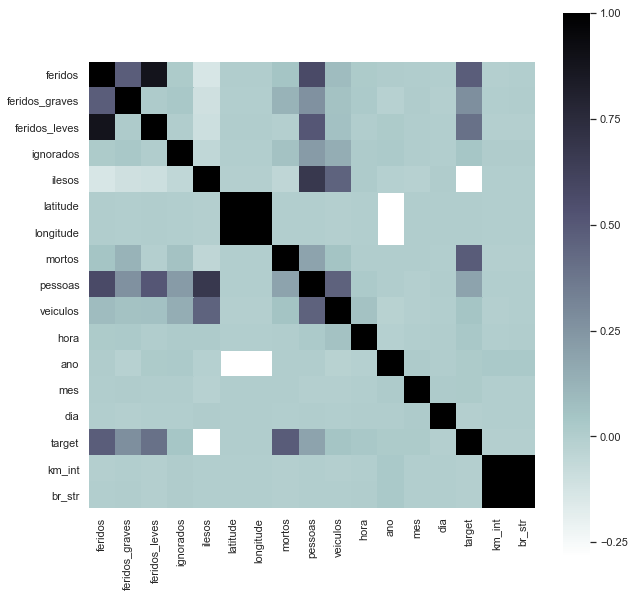

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='bone_r', square=True)

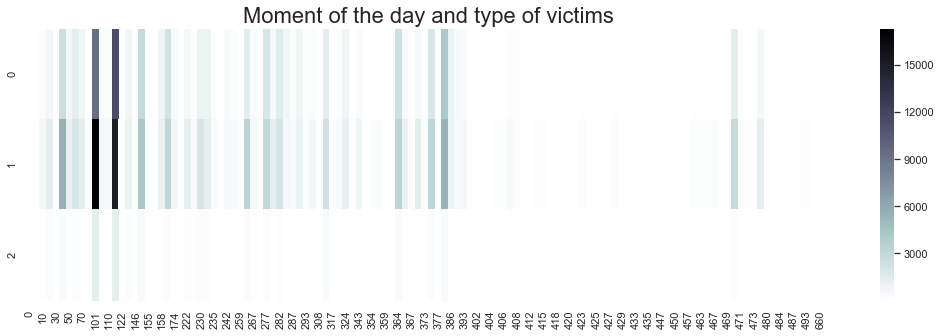

In [18]:
grouped = df.groupby(['target', 'br_str' ]).size().unstack()

plt.figure(figsize=(18,5))
sns.heatmap(grouped, cmap='bone_r')
plt.title('Moment of the day and type of victims', fontsize=22)
plt.ylabel('')
plt.xlabel('')

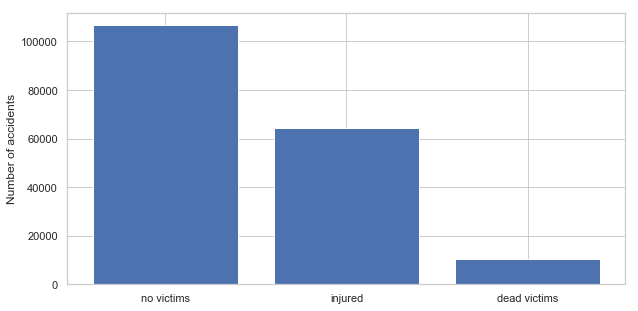

In [19]:
plt.figure(figsize=(10,5))
plt.bar(np.arange(3), df.target.value_counts())
ticks = plt.xticks(np.arange(3), ['no victims', 'injured', 'dead victims'])
plt.ylabel('Number of accidents')

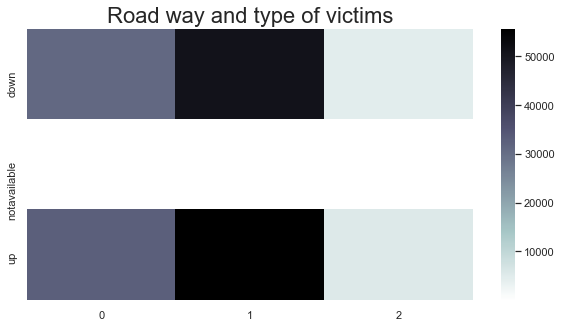

In [20]:
grouped = df.groupby(['road_way', 'target']).size().unstack()

plt.figure(figsize=(10,5))
sns.heatmap(grouped, cmap='bone_r')
plt.title('Road way and type of victims', fontsize=22)
plt.ylabel('')
plt.xlabel('')

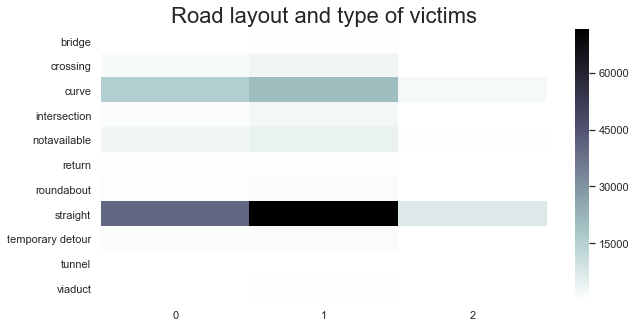

In [21]:
grouped = df.groupby(['road_layout', 'target']).size().unstack()

plt.figure(figsize=(10,5))
sns.heatmap(grouped, cmap='bone_r')
plt.title('Road layout and type of victims', fontsize=22)
plt.ylabel('')
plt.xlabel('')

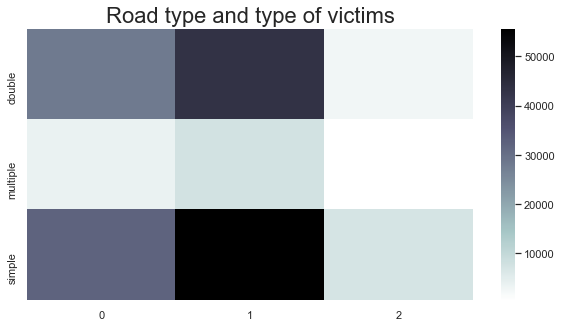

In [22]:
grouped = df.groupby(['road_type', 'target']).size().unstack()

plt.figure(figsize=(10,5))
sns.heatmap(grouped, cmap='bone_r')
plt.title('Road type and type of victims', fontsize=22)
plt.ylabel('')
plt.xlabel('')

In [23]:
df.columns

Index(['delegacia', 'feridos', 'feridos_graves', 'feridos_leves', 'ignorados',
       'ilesos', 'latitude', 'longitude', 'mortos', 'municipio', 'pessoas',
       'regional', 'uf', 'uop', 'uso_solo', 'veiculos', 'hora', 'ano', 'mes',
       'dia', 'target', 'weekday', 'accident_type', 'accident_type_simplified',
       'accident_cause_simplified', 'climate', 'moment_of_day', 'km_int',
       'br_str', 'road_type', 'road_way', 'road_layout', 'causa_acidente',
       'tipo_acidente'],
      dtype='object')

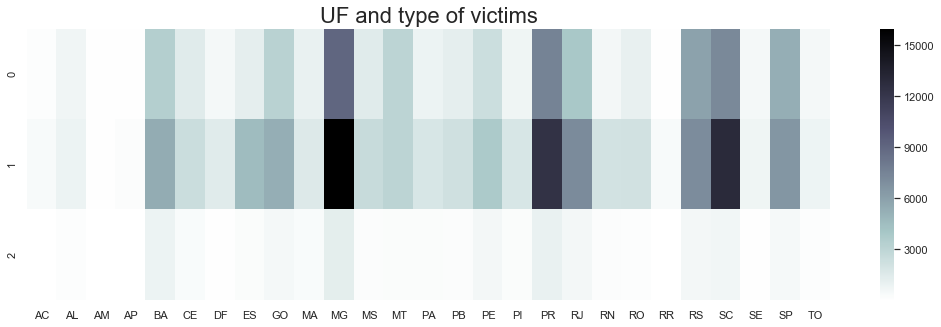

In [24]:
grouped = df.groupby(['target', 'uf']).size().unstack()

plt.figure(figsize=(18,5))
sns.heatmap(grouped, cmap='bone_r')
plt.title('UF and type of victims', fontsize=22)
plt.ylabel('')
plt.xlabel('')

In [35]:
new_df = {}
for i, row in grouped.iteritems():
    new_df[i] = row*100/row.sum()
    
new_df = pd.DataFrame(new_df)
new_df.head()

,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
target,,,,,,,,,,,,,,,,,,,,,
0,25.593220,38.940982,41.696113,28.023599,35.145552,34.064908,24.988078,19.829982,35.294766,34.582911,...,36.092841,34.002211,21.249582,31.789230,17.962963,43.746343,34.816516,38.968092,43.125904,36.119974
1,69.491525,52.123552,47.703180,66.961652,55.421442,57.459724,70.577015,75.461828,58.743802,53.259034,...,58.969593,60.879177,70.397594,62.825709,73.333333,51.755413,61.863069,54.854039,53.119473,54.690491
2,4.915254,8.935466,10.600707,5.014749,9.433005,8.475368,4.434907,4.708190,5.961433,12.158055,...,4.937566,5.118612,8.352823,5.385061,8.703704,4.498245,3.320415,6.177868,3.754623,9.189534


In [43]:
grouped['SC'].sum()

20901

In [53]:
proportion = new_df.T
proportion[proportion[0]>40]

target,0,1,2
AM,41.696113,47.703180,10.600707
MT,47.567485,47.430227,5.002288
RS,43.746343,51.755413,4.498245
SP,43.125904,53.119473,3.754623


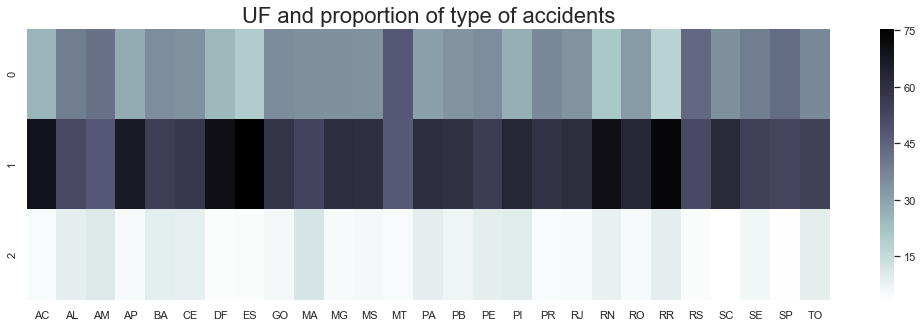

In [37]:
plt.figure(figsize=(18,5))
sns.heatmap(new_df, cmap='bone_r')
plt.title('UF and proportion of type of accidents', fontsize=22)
plt.ylabel('')
plt.xlabel('')

(0, 23)

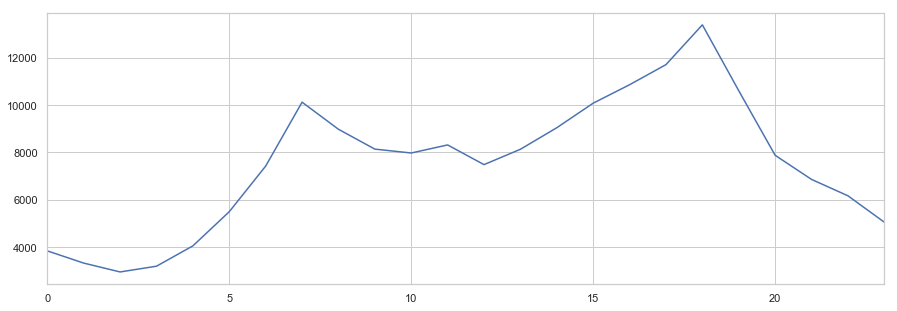

In [26]:
accidents_per_hour = df.hora.value_counts()

plt.figure(figsize=(15,5))
plt.plot(accidents_per_hour.sort_index())
plt.xlim(0, 23)

(13000, 17000)

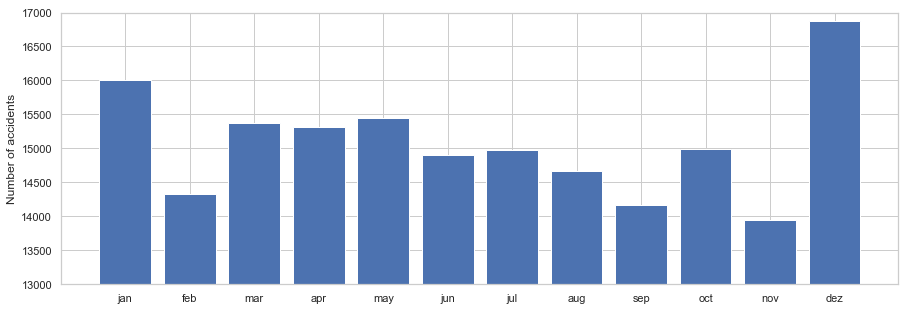

In [38]:
accidents_per_month = df.mes.value_counts()

plt.figure(figsize=(15,5))
plt.bar(np.arange(12), accidents_per_month.sort_index())
ticks = plt.xticks(np.arange(12), ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dez'])
plt.ylabel('Number of accidents')
plt.ylim(13000,17000)

(80000, 95000)

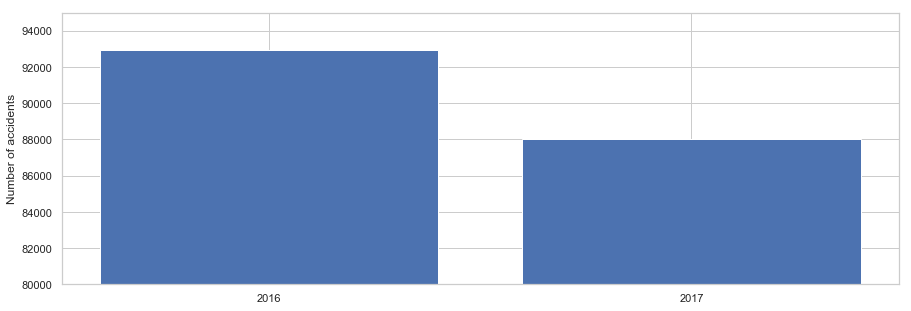

In [41]:
accidents_per_year = df.ano.value_counts()

plt.figure(figsize=(15,5))
plt.bar(np.arange(2), accidents_per_year.sort_index())
ticks = plt.xticks(np.arange(2), [2016, 2017])
plt.ylabel('Number of accidents')
plt.ylim(80000, 95000)

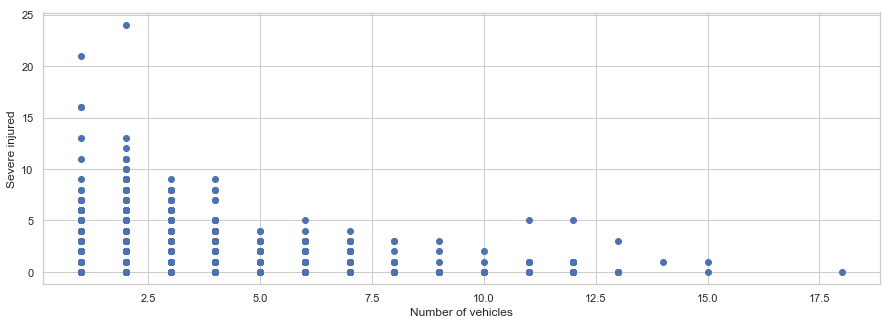

In [49]:
plt.figure(figsize=(15,5))
plt.scatter(df.veiculos, df.feridos_graves)
plt.ylabel('Severe injured')
plt.xlabel('Number of vehicles')

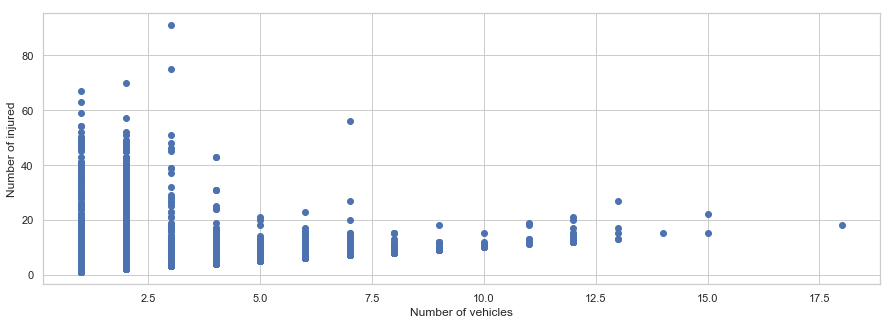

In [52]:
plt.figure(figsize=(15,5))
plt.scatter(df.veiculos, df.pessoas)
plt.ylabel('Number of injured')
plt.xlabel('Number of vehicles')